In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from utils.forecast_loader import *
import pickle

In [2]:
datapath = Path(Path().cwd().parents[2]) / 'data'
tpepath = datapath / 'Forecasts' / 'TPE Search results'

In [3]:
waterboards = ['HHNK', 'HDSR', 'Rijnland', 'Waternet']
# wb_exp_name = 'CQRDNN_10_280223_ClusteredUniform'
wb_exp_name = 'CQRDNN_10_280223_NotClustered'
wl_exp_name = 'CQRDNN_WL_IJmuiden'
wbpath = tpepath / wb_exp_name
wlpath = tpepath / wl_exp_name

rijnland_path = tpepath / 'CQRDNN_10_270323_NotClustered' / 'Rijnland'
rijnland_sep_path = tpepath / 'CQRDNN_10_sep_170323_NotClustered' / 'Rijnland'

dam_path = tpepath / 'CQRDNN_DAM'


In [4]:
# forecasts = {
#     wb: pd.read_csv(wbpath / wb / 'Forecasts' / 'test_fc_sorted.csv', index_col=0, parse_dates=True).astype(float) for wb in waterboards if wb != 'Rijnland'
# }
# forecasts['WL'] = pd.read_csv(wlpath / 'Forecasts' / 'test_fc_sorted.csv', index_col=0, parse_dates=True).astype(float)
# forecasts['Rijnland'] = pd.read_csv(rijnland_path / 'Forecasts' / 'test_fc_sorted.csv', index_col=0, parse_dates=True).astype(float)
# # forecasts = {}
# forecasts['DAM'] = pd.read_pickle(dam_path / 'Forecasts' / 'p_test_online.pkl')


In [5]:
# target = {
#     wb: pd.read_csv(wbpath / wb / 'Forecasts' / 'y_test.csv', index_col=0, parse_dates=True).astype(float) for wb in waterboards
# }
# target['WL'] = pd.read_csv(wlpath / 'Forecasts' / 'y_test.csv', index_col=0, parse_dates=True).astype(float)
# target['Rijnland'] = pd.read_csv(rijnland_path / 'Forecasts' / 'y_test.csv', index_col=0, parse_dates=True).astype(float)
# target['DAM'] = pd.read_pickle(dam_path / 'Forecasts' / 'y_test.pkl')

In [6]:
quantiles=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
plotdates=None

In [7]:
# formatted = {
#     'HHNK': FCFormatter(forecasts['HHNK'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours').format(inplace=False),
#     'HDSR': FCFormatter(forecasts['HDSR'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours').format(inplace=False),
#     'Rijnland': FCFormatter(forecasts['Rijnland'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours').format(inplace=False),
#     'Waternet': FCFormatter(forecasts['Waternet'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours').format(inplace=False),
#     'WL': FCFormatter(forecasts['WL'], fc_vars=['Aggregated'], varname='Waterlevel', n_leadtimes=48, fc_timestep='hours').format(inplace=False),
#     'DAM': FCFormatter(forecasts['DAM'],[f'DAM NL H{h}' for h in range(24)], varname='Price', n_leadtimes=2, fc_timestep='days', colstep='hours', parallel=False).format(inplace=False)
# }

In [8]:
# formatted_targets = {
#     'HHNK': FCFormatter(target['HHNK'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours', quantiles=[0.5]).format(inplace=False),
#     'HDSR': FCFormatter(target['HDSR'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours', quantiles=[0.5]).format(inplace=False),
#     'Rijnland': FCFormatter(target['Rijnland'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours', quantiles=[0.5]).format(inplace=False),
#     'Waternet': FCFormatter(target['Waternet'], fc_vars=['Aggregated'], varname='Discharge', n_leadtimes=48, fc_timestep='hours', quantiles=[0.5]).format(inplace=False),
#     'WL': FCFormatter(target['WL'], fc_vars=['WL'], varname='Waterlevel', n_leadtimes=48, fc_timestep='hours', quantiles=[0.5]).format(inplace=False),
#     'DAM': FCFormatter(target['DAM'],[f'DAM NL H{h}' for h in range(24)], varname='Price', n_leadtimes=2, fc_timestep='days', colstep='hours', quantiles=[0.5], parallel=False).format(inplace=False)
# }

In [9]:
# idx = pd.IndexSlice
# for name in formatted_targets.keys():
#     try:
#         formatted_targets[name] = formatted_targets[name][0]
#     except:
#         pass
        
#     formatted_targets[name] = formatted_targets[name].loc[idx[:, :, 0.5], :]
#     formatted_targets[name].index = formatted_targets[name].index.droplevel(2)

In [10]:
# with open((datapath / 'Forecasts' / 'formatted_forecasts.pkl').resolve(), 'wb') as f:
#     pickle.dump(formatted, f)

# with open((datapath / 'Forecasts' / 'formatted_targets.pkl').resolve(), 'wb') as f:
#     pickle.dump(formatted_targets, f)

In [11]:
with open((datapath / 'Forecasts' / 'formatted_forecasts.pkl').resolve(), 'rb') as f:
    formatted = pickle.load(f)

with open((datapath / 'Forecasts' / 'formatted_targets.pkl').resolve(), 'rb') as f:
    formatted_targets = pickle.load(f)

In [12]:
formatted['DAM'].to_pickle(datapath / 'Forecasts' / 'TPE Search results' / 'CQRDNN_DAM' / 'Forecasts' / 'p_test_online_formatted.pkl')

In [13]:
# formatted['HHNK'].columns = ['Discharge']
# formatted['HDSR'].columns = ['Discharge']
# formatted['Rijnland'].columns = ['Discharge']
# formatted['Waternet'].columns = ['Discharge']
# formatted['WL'].columns = ['Waterlevel']
# formatted['DAM'].columns = ['Price']

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


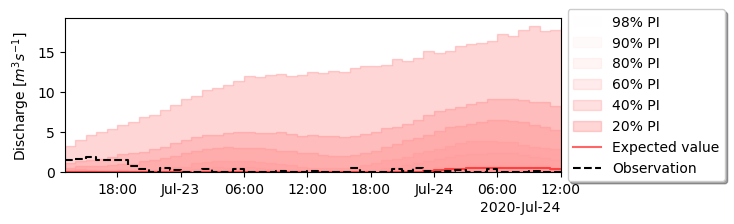

In [14]:
hhnk_fc = FCLoader(
    y_true=formatted_targets['HHNK'],
    y_pred=formatted['HHNK'],
    forecast_label='Discharge [$m^3s^{-1}$]',
    ylims=[0, None],
    forecast_hor_len=48,
    min_fc_hor=1,
    varname='Discharge'
)
hhnk_fc.plot()

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


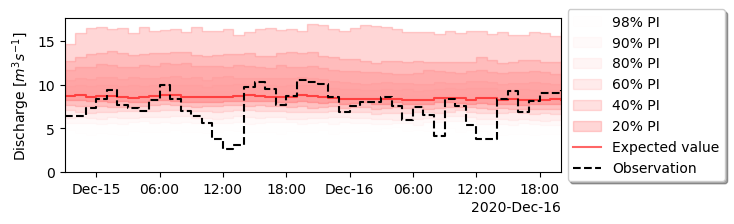

In [15]:
hdsr_fc = FCLoader(
    y_true=formatted_targets['HDSR'],
    y_pred=formatted['HDSR'],
    forecast_label='Discharge [$m^3s^{-1}$]',
    ylims=[0, None],
    forecast_hor_len=48,
    min_fc_hor=1,
    varname='Discharge'
)
hdsr_fc.plot()

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


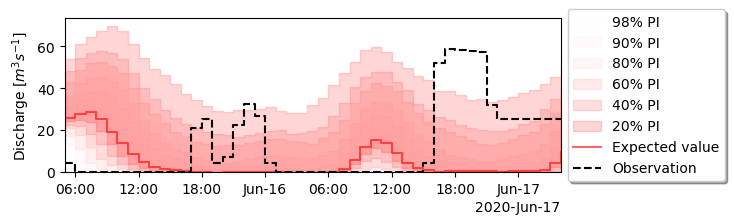

In [16]:
rijnland_fc = FCLoader(
    y_true=formatted_targets['Rijnland'],
    y_pred=formatted['Rijnland'],
    forecast_label='Discharge [$m^3s^{-1}$]',
    ylims=[0, None],
    forecast_hor_len=48,
    min_fc_hor=1,
    varname='Discharge'
)
rijnland_fc.plot()

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


(0.0, 60.0)

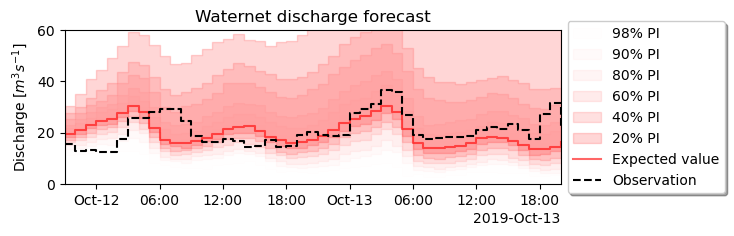

In [17]:
waternet_fc = FCLoader(
    y_true=formatted_targets['Waternet'],
    y_pred=formatted['Waternet'],
    forecast_label='Discharge [$m^3s^{-1}$]',
    ylims=[0, None],
    forecast_hor_len=48,
    min_fc_hor=1,
    varname='Discharge'
)
waternet_fc.plot()
plt.title('Waternet discharge forecast')
plt.ylim(0, 60)

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


Text(0.5, 1.0, 'North Sea waterlevel forecast')

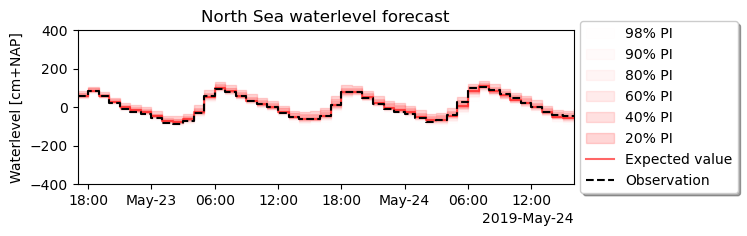

In [18]:
wl_fc = FCLoader(
    y_true=formatted_targets['WL'],
    y_pred=formatted['WL'],
    forecast_label='Waterlevel [cm+NAP]',
    ylims=[-400, 400],
    forecast_hor_len=48,
    min_fc_hor=1,
    varname='Waterlevel'
)
wl_fc.plot()
plt.title('North Sea waterlevel forecast')

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


Text(0.5, 1.0, 'Day ahead market price forecast')

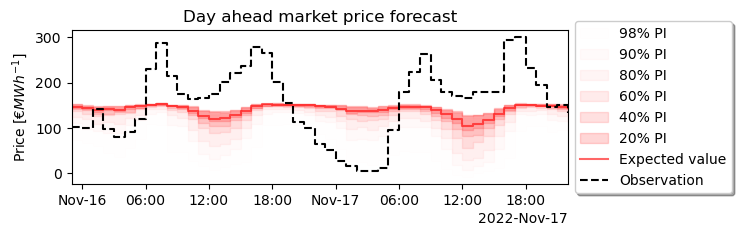

In [19]:
dam_fc = FCLoader(
    y_true=formatted_targets['DAM'],
    y_pred=formatted['DAM'],
    forecast_label='Price [$€MWh^{-1}$]',
    ylims=[None, None],
    forecast_hor_len=48,
    min_fc_hor=24,
    varname='Price'
)
dam_fc.plot()
plt.title('Day ahead market price forecast')
# plt.ylim(0, 400)

In [20]:
dam_fc.forecast_indices

MultiIndex([('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00', 0.01),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00', 0.05),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.1),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.2),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.3),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.4),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.5),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.6),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.7),
            ('2021-01-05 00:00:00+01:00', '2021-01-06 00:00:00+01:00',  0.8),
            ...
            ('2022-11-29 00:00:00+01:00', '2022-12-01 23:00:00+01:00',  0.2),
            ('2022-11-29 00:00:00+01:00', '2022-12-01 23:00:00+01:00',  0.3),
            ('2022-11-29 00:00:00+01:00', '2022-

In [21]:
wl_fc.forecast_indices

MultiIndex([('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00', 0.01),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00', 0.05),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.1),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.2),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.3),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.4),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.5),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.6),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.7),
            ('2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',  0.8),
            ...
            ('2021-01-30 21:00:00+00:00', '2021-02-01 21:00:00+00:00',  0.2),
            ('2021-01-30 21:00:00+00:00', '2021-02-01 21:00:00+00:00',  0.3),
            ('2021-01-30 21:00:00+00:00', '2021-

hhnk: 9688354
waternet: 4905721
hdsr: 6046484
rijnland: 8675910
wl: 8524944
dam: 59625 2021-05-26 00:00:00+02:00


d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()
d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()
d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_load

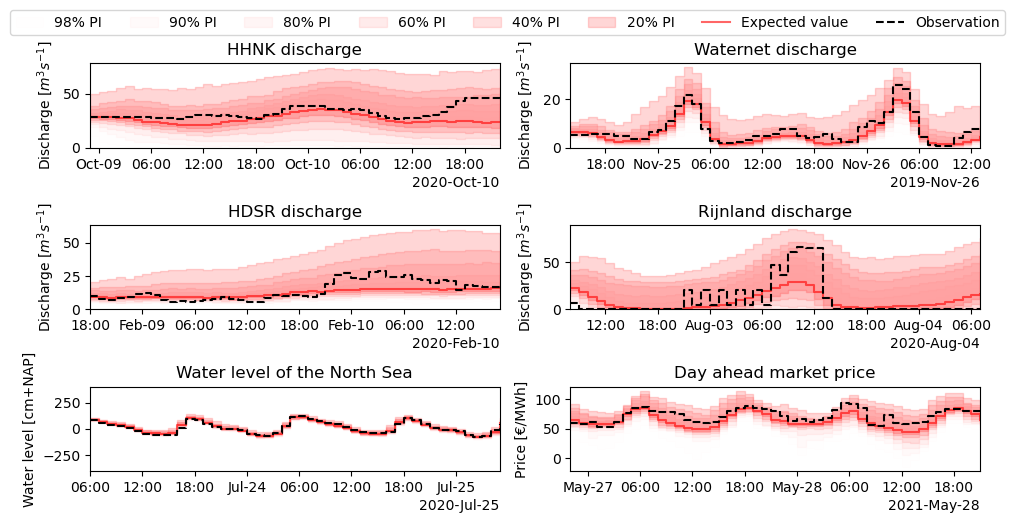

In [24]:
hhnk_id = 9688354#np.random.randint(0, high=len(hhnk_fc.forecast_indices)-1)
hhnk_index = hhnk_fc.forecast_indices[hhnk_id][0]
print('hhnk:', hhnk_id)

waternet_id = 4905721#np.random.randint(0, high=len(waternet_fc.forecast_indices)-1)
waternet_index = waternet_fc.forecast_indices[waternet_id][0]
print('waternet:', waternet_id)

hdsr_id = 6046484#np.random.randint(0, high=len(hdsr_fc.forecast_indices)-1)
hdsr_index = hdsr_fc.forecast_indices[hdsr_id][0]
print('hdsr:', hdsr_id)

rijnland_id = 8675910#np.random.randint(0, high=len(rijnland_fc.forecast_indices)-1)
rijnland_index = rijnland_fc.forecast_indices[rijnland_id][0]
print('rijnland:', rijnland_id)

wl_id = 8524944#np.random.randint(0, high=len(wl_fc.forecast_indices)-1)
wl_index = wl_fc.forecast_indices[wl_id][0]
print('wl:', wl_id)

dam_id = 59625#np.random.randint(0, high=len(dam_fc.forecast_indices)-1)
dam_index = dam_fc.forecast_indices[dam_id][0]
print('dam:', dam_id, dam_index)

fig, ax = plt.subplots(3, 2, figsize=(10, 5))
ax = ax.flatten()

hhnk_fc.plot(ax=ax[0], forecast_index=hhnk_index)
ax[0].set_title('HHNK discharge')
ax[0].set_ylabel('Discharge [$m^3s^{-1}$]')

waternet_fc.plot(ax=ax[1], forecast_index=waternet_index)
ax[1].set_title('Waternet discharge')
ax[1].set_ylabel('Discharge [$m^3s^{-1}$]')

hdsr_fc.plot(ax=ax[2], forecast_index=hdsr_index)
ax[2].set_title('HDSR discharge')
ax[2].set_ylabel('Discharge [$m^3s^{-1}$]')

rijnland_fc.plot(ax=ax[3], forecast_index=rijnland_index)
ax[3].set_title('Rijnland discharge')
ax[3].set_ylabel('Discharge [$m^3s^{-1}$]')

wl_fc.plot(ax=ax[4], forecast_index=wl_index)
ax[4].set_title('Water level of the North Sea')
ax[4].set_ylabel('Water level [cm+NAP]')

dam_fc.plot(ax=ax[5], forecast_index=dam_index)
ax[5].set_title('Day ahead market price')
ax[5].set_ylabel('Price [€/MWh]')

# Add a shared legend and put it below the last row, outside of the plot, only one row with every item next to each other
lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', ncol=8, bbox_to_anchor=(0.5, 1.05))

fig.tight_layout()
plt.savefig('figures/forecast_example.pdf', dpi=300, bbox_inches='tight')

In [68]:
hhnk_fc

In [19]:
formatted_targets['DAM']

Price
forecast_time             obersvation_time                 
2021-01-04 00:00:00+01:00 2021-01-05 00:00:00+01:00   41.82
                          2021-01-05 01:00:00+01:00   41.98
                          2021-01-05 02:00:00+01:00   41.92
                          2021-01-05 03:00:00+01:00   42.00
                          2021-01-05 04:00:00+01:00   41.96
...                                                     ...
2022-11-29 00:00:00+01:00 2022-12-01 19:00:00+01:00  457.89
                          2022-12-01 20:00:00+01:00  408.00
                          2022-12-01 21:00:00+01:00  299.90
                          2022-12-01 22:00:00+01:00  319.14
                          2022-12-01 23:00:00+01:00  304.80

[23184 rows x 1 columns]

d:\Users\Heijden\Documents\PhD work\Current work\EGU23\scripts\forecasting\src\utils\forecast_loader.py:294: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, q] = df_slice.loc[idx[:, q], self.varname].values.flatten()


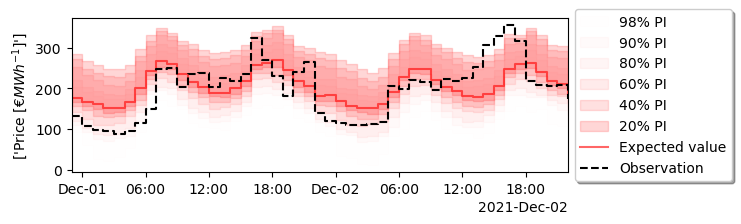

In [20]:
dam_fc.plot()

In [1]:
wl_fc.plot_multiple()


NameError: name 'wl_fc' is not defined

In [22]:
target['DAM']

NameError: name 'target' is not defined